<a href="https://colab.research.google.com/github/Lenalex45/MachineLearningTD1/blob/main/Projet_Pollen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from skimage import feature
import os
import cv2
from matplotlib import pyplot as plt
from PIL import Image , ImageEnhance, ImageFilter
from google.colab import files

from google.colab import drive

from skimage.feature import peak_local_max, blob_log

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Lister tous les fichiers/dossiers dans le dossier d'images

image_folder_path = '/content/drive/My Drive/Pollen2' #chemin d'accès du dossier drive

for file_name in os.listdir(image_folder_path):
    print(file_name)

In [ ]:
## Afficher la photo brute (et enregistrer dans telechargements)

file_path = "/content/drive/My Drive/Pollen2/IMG_3007.JPG"
img = Image.open(file_path)
img.show()

img.save('image_brute.png')
files.download('image_brute.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Rogner (et enregistrer dans telechargements)

img = cv2.imread(file_path)
imgp = Image.fromarray(img) #conversion: type PIL

box = (2300, 750, 2202+500, 701+2050) # Coordonnées du rectangle de rognage (left, upper, right, lower)

cropped_imgp = imgp.crop(box)

cropped_imgp.save('image_cropped.png')
files.download('image_cropped.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Mettre l'image en niveaux de gris (et enregistrer dans telechargements)

cropped_imgp2 = np.array(cropped_imgp) #conversion: type np.array
gray_image = cv2.cvtColor(cropped_imgp2, cv2.COLOR_BGR2GRAY)

gray_image2 = Image.fromarray(gray_image) #conversion: type PIL
gray_image2.save('image_grayscale.png')
files.download('image_grayscale.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Réduire la résolution (et enregistrer dans telechargements)

dim = (int(gray_image.shape[1] * 50/100), int(gray_image.shape[0] * 50/100))
gray_image = cv2.resize(gray_image, dim, interpolation=cv2.INTER_AREA)

gray_image4 = Image.fromarray(gray_image) #conversion: type PIL
gray_image4.save('image_reduced_resolution.png')
files.download('image_reduced_resolution.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Flouter (et enregistrer dans telechargements)

for k in range(3):
  gray_image = cv2.GaussianBlur(gray_image, (5,5), 0)

gray_image5 = Image.fromarray(gray_image) #remettre en type PIL
gray_image5.save('image_blurr.png')
files.download('image_blurr.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Nombre estimé de grains de pollen: 28


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

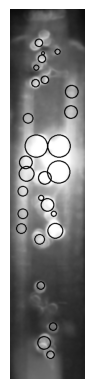

In [ ]:
## Compter et afficher les grains de pollen (et enregistrer dans telechargements)

blobs = blob_log(gray_image, max_sigma=30, num_sigma=10, threshold = .1)
for blob in blobs:
  y, x, area = blob
  cv2.circle(gray_image, (int(x), int(y)), int(area), (0,0,255), 2)
print(f"Nombre estimé de grains de pollen: {len(blobs)}")

plt.axis('off')
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))

gray_image6 = Image.fromarray(gray_image) #remettre en type PIL
gray_image6.save('image_pollen_count.png')
files.download('image_pollen_count.png')